In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


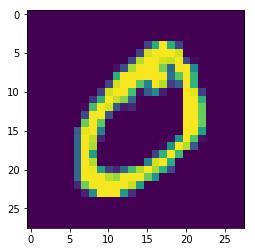

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
from keras.layers import Activation
model = Sequential()
 

model.add(Convolution2D(4, (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False)) # 26 x 26  x 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, (3, 3), activation='relu', use_bias = False)) # 24x 24 x 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False)) # 22x 22 x 16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2,2)) # 11 x 11 x 16

model.add(Convolution2D(8, (3, 3), activation='relu', use_bias = False)) # 9 x 9 x 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False)) # 7 x 7 x 16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, (3, 3), activation='relu', use_bias = False)) # 5 x 5 x 32
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(AveragePooling2D(5,5)) # 1 x 1 x 32
model.add(Convolution2D(10, (1,1), activation = 'relu', use_bias = False)) # 1 x 1 x 10

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 4)         36        
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 4)         16        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 8)         288       
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 16)       

In [14]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 214us/step - loss: 0.0240 - acc: 0.9921 - val_loss: 0.0313 - val_acc: 0.9902
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 175us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0254 - val_acc: 0.9923
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 172us/step - loss: 0.0182 - acc: 0.9943 - val_loss: 0.0194 - val_acc: 0.9938
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [15]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020208156953587603, 0.994]
